<a href="https://colab.research.google.com/github/paigeyeung/exowatch-colab/blob/master/Qatar-1_b_Exoplanet_Transit_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing the Notebook

Before anything else, make a copy of this notebook in your drive. You will be using this copy to run everything.

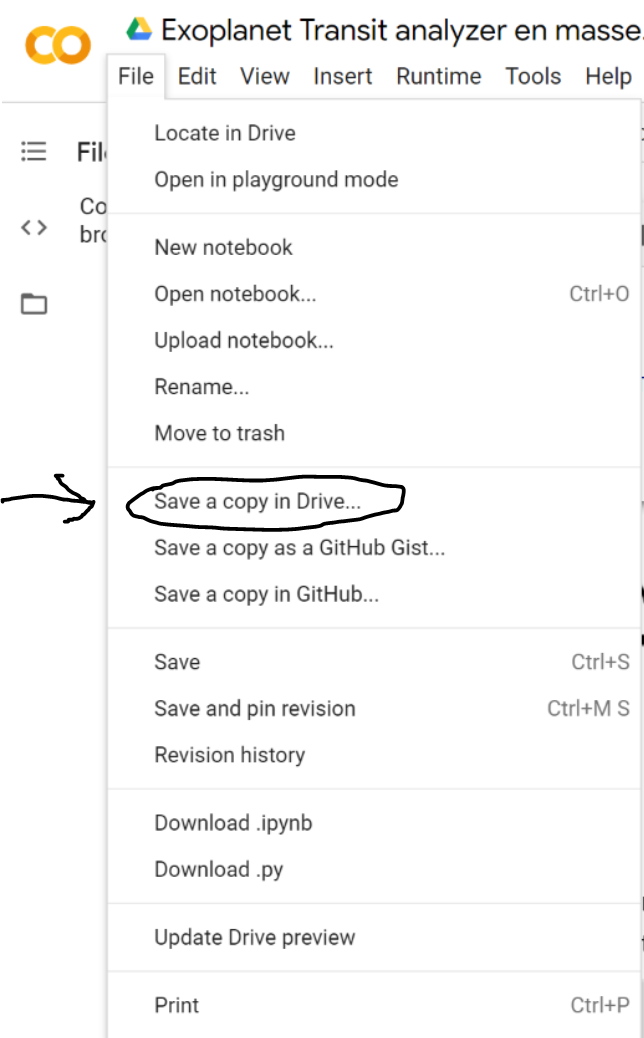

To start, run the two cells below to mount google drive. To run a cell, simply click the play button in the upper left corner.
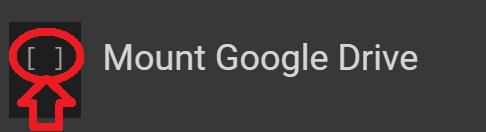

For each of the two cells, you will see a link to click. Click that link, click allow, copy the authorization code you get, and enter it into the box you get after running the cell.

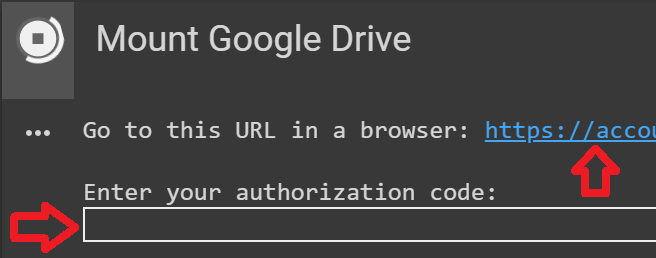




---



---


---



---




In [1]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




---



---



---



---



# Entering Parameters

Enter the values for each of the variables below based on the transit you are ananlyzing and the folders in your drive. *PLEASE* PUT A '/' AT THE END OF EACH PATH TO A FOLDER.* See below for a desciption of each parameter. 
* name your name/name of person running EXOTIC on this transit
* link_to_out <- link to the output folder
  *  make sure to change the sharing settings in google drive to 'anyone with the link can edit' 
*   out_dir <- path to the folder to put output files in
  * if in google drive, begin with '/content/drive/My Drive/' before the folder name
* folder_to_transits <- path to folder containing transit
   * if in google drive, begin with '/content/drive/My Drive/' before the folder name
* transits <- the date of the transits you want to run in yyyy-mm-dd
  * enter the transits as a comma separated list
* comp_star <- the number corresponding to the comparison star used
  * each copmarison star will be run individually
  * see the printed output on the "Observation Parameters" cell below to find out which star each number corresponds to
  * see an image with the comparison stars labelled in [this document](https://docs.google.com/document/d/1eeHOUUWzGdqnjGcrdQWjdsOnXldMzAZCZPUTrDnUa_k/edit#heading=h.ftwd3tx04s5x)


---



---

$\LARGE\boxed{\text{Do not just run the cell below! You will have to change it to your specifications.}}$

---


---


In [26]:
#@title Program Arguments { run: "auto" }
import numpy as np
name = "Paige Yeung" #@param {type:"string"}
link_to_out = "https://drive.google.com/drive/u/0/folders/1gLdOIKlZJGe1hgibTE0hy5C9nm7iqOnr" #@param {type:"string"}
out_dir = "/content/drive/My Drive/out_paige/" #@param {type:"string"}
folder_to_transits = "/content/drive/My Drive/Qatar-1b-transits/" #@param {type:"string"}
transits = "2011-05-24" #@param {type:"string"}
planet_name = "Qatar-1b" #@param {type:"string"}
comps = "0, 1, 2" #@param {type:"string"}
your_own_spreadsheet_link = "https://docs.google.com/spreadsheets/d/1vJHcAtLKgcOKKE80_9waRXWP7cTD8JjasdZYrp51bSY/edit#gid=0" #@param {type:"string"}
comps = list(np.array(comps.split(",")).astype(int))
transits = transits.split(",")
folder_to_transits_unix = folder_to_transits.replace(' ', '\\\\ ')



---



---



---



---



If you want individual credit for the transits you run, you will have to create an AAVSO account. To do so, you [can register here](https://www.aavso.org/apps/register/). You will receive an email conformation, which you will have to click on, then log in again, and click to request an 'Obscode'. You can then enter this code below. Otherwise the code below will point to a group account. See below for a description of the parameters.


*   AAVSO_out <- #enter 'y' if you want to get an AAVSO output file to upload to the AAVSO database; enter 'n' otherwise
*   AAVSO_account <- enter the account number/code you got from AAVSO
  * this points to a group account by default




---



---

$\LARGE\boxed{\text{Do not just run the cell below! You will have to change it to your specifications.}}$

---


---

In [3]:
#@title AAVSO Settings { run: "auto" }
AAVSO_out = "y" #@param {type:"string"}
AAVSO_account = "OSTA" #@param {type:"string"}




---



---



---



---



For each of the planetary parameters below, check it against the [NASA exoplanet archive](https://exoplanetarchive.ipac.caltech.edu/). As the observed quantities are sometimes updated, we want to make sure we have the most recent values. To do so, go to the archive, search for the plaet by name (Qatar-1 b in this case), and check each value in this colab against the corresponding value in the orange row in the archive (you'll have to scroll down to see all the orange rows). These orange rows correspond to the most trusted measurements. If the values don't match, change the value in the colab to match. If there is no value in the orange row corresponding to the parameter, leave the value in the colab as is.
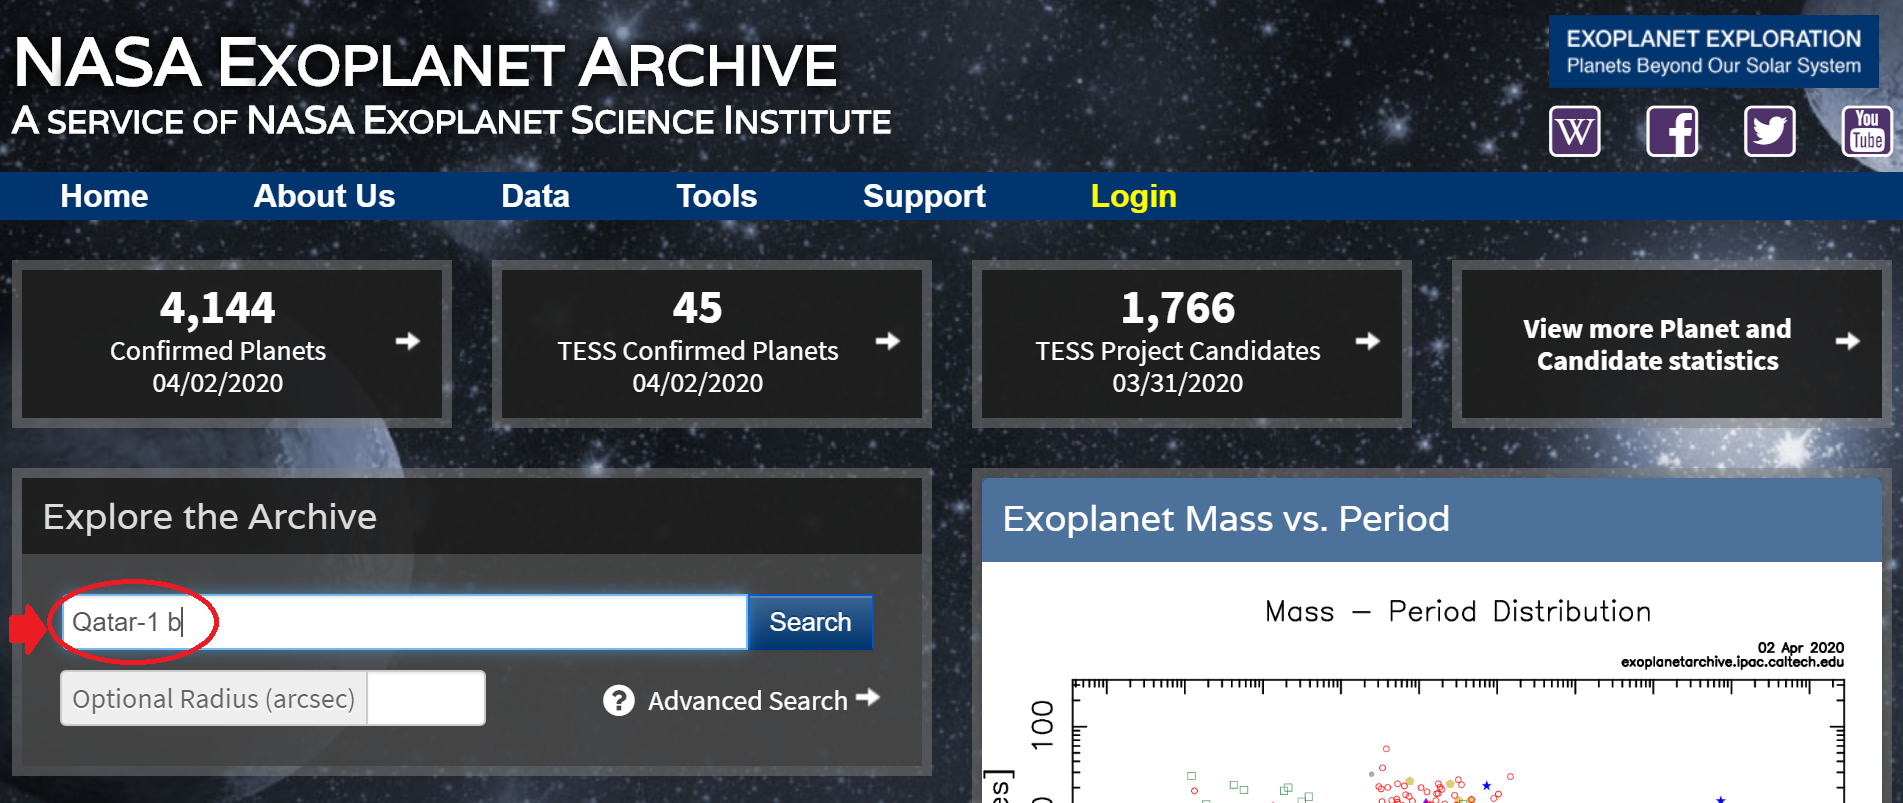

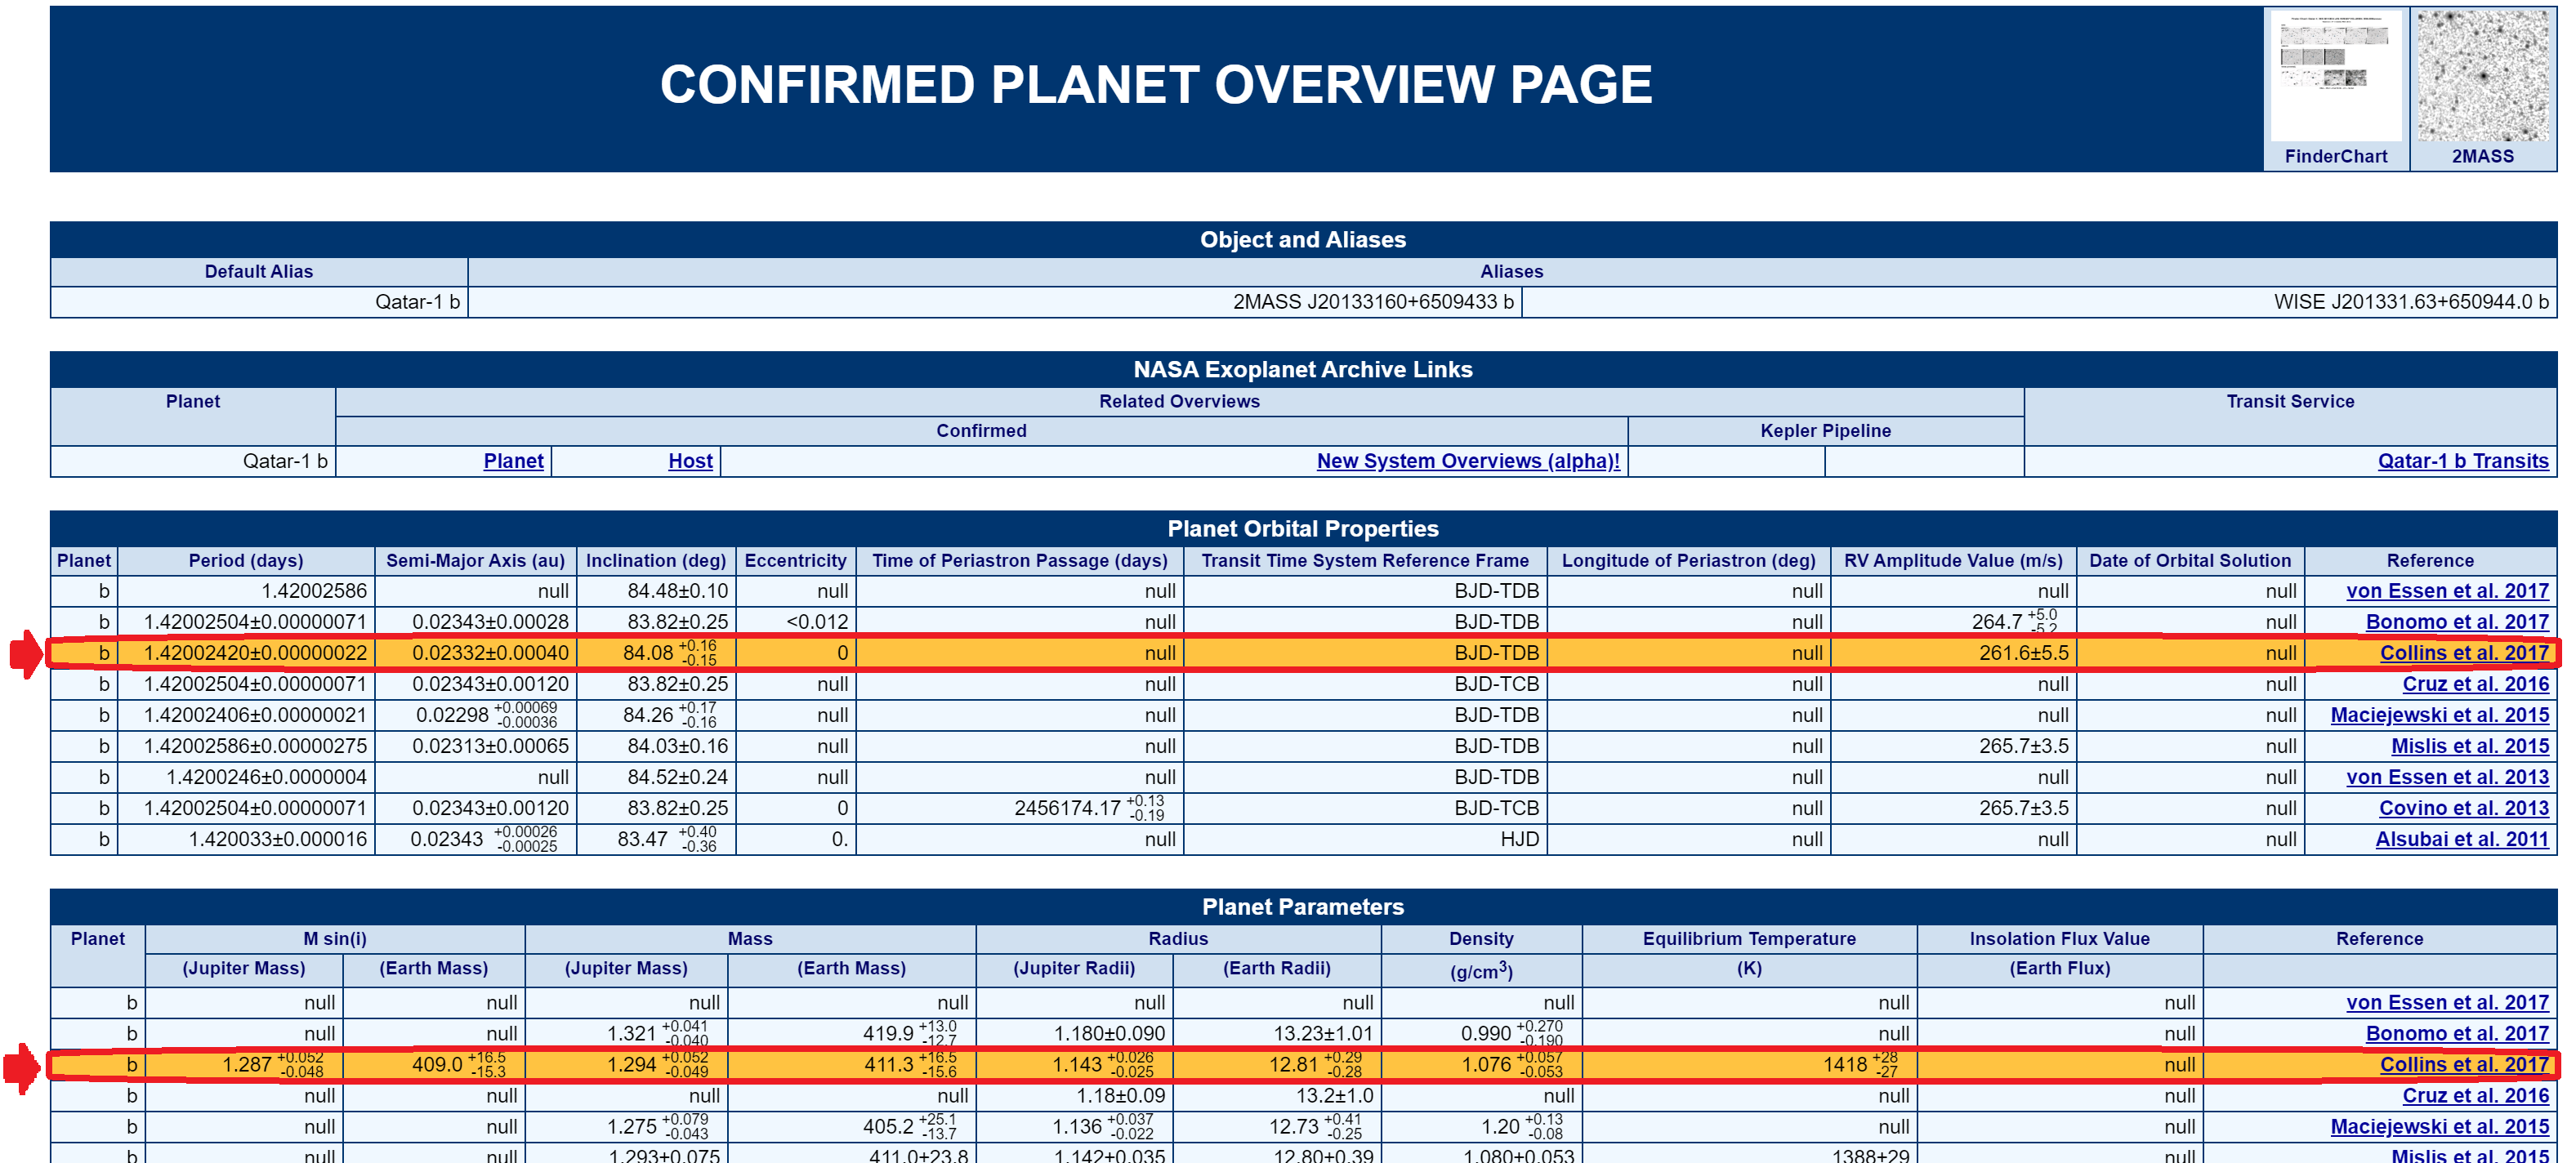

See below for a description of each parameter


* orbital_period <- orbital period in days
* orbital_period_u <- orbital period uncertainty in days
* published_mt <- published mid-transit time in BJD
* published_mt_u <- published mid-transit time uncertainty in BJD
* rp_rs <- ratio of planet to stellar radius (R_p/R_s)
* a_rs <- ratio of distance to stellar radius (a/R_s)
* orbital_inclination <- orbital inclination in degrees
* eccentricity <- this is a measure of how circular the orbit is
* T_eff <- Effective temperature of target star (K)
* metallicity <- metallicity of the target star ([FE/H])
* grav <- target star surface gravity log(g)



---



---

**$\LARGE\boxed{\text{Do not just run the cell below! You will have to check the parameters with the NASA Exoplanet Archive.}}$**

---



---



In [27]:
#@title Planetary Parameters { run: "auto" }
orbital_period = "1.42002420" #@param {type:"string"}
orbital_period_u = "0.00000022" #@param {type:"string"}
published_mt = "2456234.10321800" #@param {type:"string"}
published_mt_u = "0.00006071" #@param {type:"string"}
rp_rs = "0.14629" #@param {type:"string"}
a_rs = "6.247" #@param {type:"string"}
orbital_inclination = "84.08" #@param {type:"string"}
eccentricity = "0" #@param {type:"string"}
T_eff = "5013" #@param {type:"string"}
T_eff_u_pos = "93" #@param {type:"string"}
T_eff_u_neg = "-88" #@param {type:"string"}
metallicity = "0.171" #@param {type:"string"}
metallicity_u_pos = "0.097" #@param {type:"string"}
metallicity_u_neg = "-0.094" #@param {type:"string"}
grav = "4.552" #@param {type:"string"}
grav_u_pos = "0.012" #@param {type:"string"}
grav_u_neg = "-0.011" #@param {type:"string"}



---



---



---



---



The following parameters depend on the planet/system and on how and from where the observations were taken. You should not have to change any of the values below. Nevertheless, you can see descriptions of the variables below.


*   cam_type <- CCD or DSLR
* pix_binning <- Pixel Binning
* filter_name <- see aavso.org/filters
* observing_notes <- miscellaneous notes on the observation, weather conditions, etc.
* target_RA <- decimal form of right ascension of target star
* target_Dec <- decimal form of right declination of target star
* target_RA_long <- Target Star RA (hh:mm:ss)
* target_Dec_long <- Target Star Dec (+/-hh:mm:ss)
* elevation <- this is the latitude of the observing location
  * based on latitude and longitude of the observing location, you can look this up online
* spreadsheet_link <- link to the spreadsheet into which the data will be entered
  * this is a central spreadsheet, please do not change this link





---



---



---



---



In [5]:
#@title Observational Parameters { run: "auto" }
import numpy as np
cam_type = "CCD" #@param {type:"string"}
pix_binning = "2x2" #@param {type:"string"}
filter_name = "CV" #@param {type:"string"}
observing_notes = "In collaboration with the Center for Astrophysics | Harvard & Smithsonian, MicroObservatory Network" #@param {type:"string"}
target_RA_long = "20:13:31.60" #@param {type:"string"}
target_Dec_long = "+65:09:43.3" #@param {type:"string"}
target_RA = 303.381672 #@param {type:"number"}
target_Dec = 65.162041 #@param {type:"number"}
elevation = "2616" #@param {type:"string"}
comp_RAs = "303.217222, 303.422269, 303.540680, 303.129925, 303.217368, 303.323086, 303.487826, 303.616661, 303.704330, 303.712935, 303.619811 " #@param {type:"string"}
comp_Decs = "65.243528, 65.192449, 65.215220, 65.317212, 65.053911, 65.079204, 65.252239, 65.107502, 65.181065, 65.266000, 65.129124" #@param {type:"string"}
spreadsheet_link = "https://docs.google.com/spreadsheets/d/1Dxzc-wokpxACASY-wdQwIe3bwgWNYTvwQJmjC5c3YWs/edit#gid=0" #@param {type:"string"}

d_comp_stars_Dec = dict(zip(range(len(comp_Decs)),list(np.array(comp_Decs.split(",")).astype(float))))
d_comp_stars_RA = dict(zip(range(len(comp_RAs)),list(np.array(comp_RAs.split(",")).astype(float))))
#print("Dictionary of comparison star RAs by star:", d_comp_stars_RA)
#print("Dictionary of comparison star Decs by star:", d_comp_stars_Dec)
print('comp #' + '\t| ' +'RA (deg)'+ '\t|' +'Dec (deg)'+ '\t|'+' RA (HH:MM:SS.s)' +'\t| ' +'Dec (+/-DD:MM:SS.s)')
comp_array = []
comp_array.append(["20:12:52.1", "+65:14:36.5"])
comp_array.append(["20:13:41.3", "+65:11:32.8"]) 
comp_array.append(["20:14:09.8", "+65:12:54.8"]) 
comp_array.append(["20:12:31.1", "+65:19:01.5"]) 
comp_array.append(["20:12:52.2", "+65:03:14.1"]) 
comp_array.append(["20:13:17.5", "+65:04:44.7"]) 
comp_array.append(["20:13:57.1", "+65:15:08.1"]) 
comp_array.append(["20:14:28.0", "+65:06:27.1"])
comp_array.append(["20:14:49.0", "+65:10:51.8"])
comp_array.append(["20:14:51.1", "+65:15:57.7"]) 
comp_array.append(["20:14:28.7", "+65:07:44.6"])
for i in range(len(d_comp_stars_RA)):
  #print("-------------------------------------")
  print(str(i) + '\t| ' +str(d_comp_stars_RA[i])+ '\t| ' +str(d_comp_stars_Dec[i])+ '\t| ' +str(comp_array[i][0])+ '\t\t| ' + str(comp_array[i][1]))


comp #	| RA (deg)	|Dec (deg)	| RA (HH:MM:SS.s)	| Dec (+/-DD:MM:SS.s)
0	| 303.217222	| 65.243528	| 20:12:52.1		| +65:14:36.5
1	| 303.422269	| 65.192449	| 20:13:41.3		| +65:11:32.8
2	| 303.54068	| 65.21522	| 20:14:09.8		| +65:12:54.8
3	| 303.129925	| 65.317212	| 20:12:31.1		| +65:19:01.5
4	| 303.217368	| 65.053911	| 20:12:52.2		| +65:03:14.1
5	| 303.323086	| 65.079204	| 20:13:17.5		| +65:04:44.7
6	| 303.487826	| 65.252239	| 20:13:57.1		| +65:15:08.1
7	| 303.616661	| 65.107502	| 20:14:28.0		| +65:06:27.1
8	| 303.70433	| 65.181065	| 20:14:49.0		| +65:10:51.8
9	| 303.712935	| 65.266	| 20:14:51.1		| +65:15:57.7
10	| 303.619811	| 65.129124	| 20:14:28.7		| +65:07:44.6




---



---



---



---



To continue, simply press run on all of the remaining cells and it will add the platesolved fits files (along with a few other files ) to a folder called plate-solved inside the folder with all the original fits files, create input files for EXOTIC, and add the processed data to the spreadsheet. Above each cell is a description of what it does

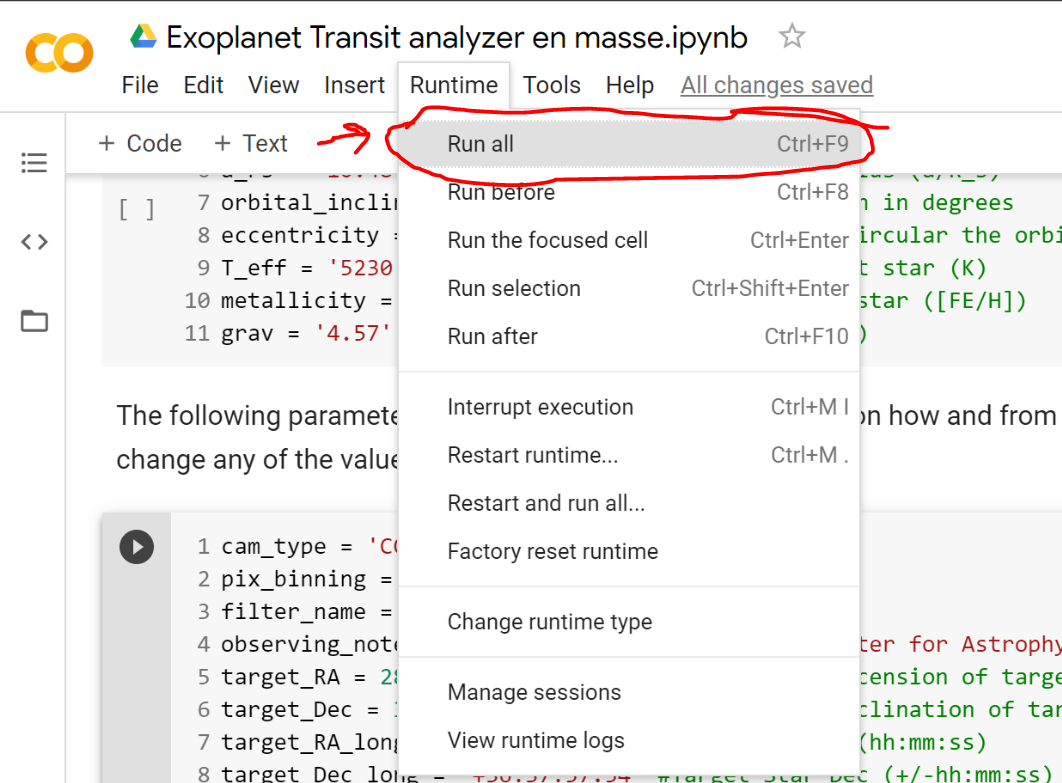



---



---



---



---



# Running the Program

The first cell below will import modules that are needed

In [6]:
#@title Import Modules
!pip install pygsheets
import pygsheets
import google.auth
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import os
import subprocess
import shutil
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import os
from astropy.time import Time
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

     |████████████████████████████████| 112kB 2.6MB/s 


Next, astrometry.net is installed in order to platesolve the fits files

In [7]:
#@title Get astrometry.net for Platesolving
!apt-get update
!apt-get install astrometry.net
!cd /usr/share/astrometry/;  wget -r -nd -A .fits http://broiler.astrometry.net/~dstn/4200/
!sudo apt-get install libvips-tools

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [94.1 kB]

The cell below will then use astrometry.net to patesolve the fits files as needed




In [8]:
#@title Platesolve to find Target and Comparison Stars
for transit in transits:
  folder_to_fits = folder_to_transits+transit+'/images/'
  folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
  os.system('mkdir "'+folder_to_fits+'plate_solved/"')
  if (not os.path.isdir(folder_to_fits+'platesolve_extra/')):
      os.mkdir(folder_to_fits+'platesolve_extra/')
  for file in sorted(os.listdir(folder_to_fits)):
    #os.system('vips im_copy "'+folder_to_fits+file+'" "'+folder_to_fits+file[:-4]+'png"')
    if file[-4:].lower() != 'fits':
      continue
    print(file)
    print(transit)
    hdul = fits.open(folder_to_fits+file)
    RA = str(hdul[0].header['RA'])
    Dec = str(hdul[0].header['DEC'])
    os.environ['RA'] = RA
    os.environ['Dec']=Dec
    os.chdir(folder_to_fits)
    os.environ['fl']='platesolve_extra/'+file
    os.system('mv "'+folder_to_fits+file+'" "'+folder_to_fits+'platesolve_extra/'+file+'"')
    !solve-field --overwrite --cpulimit 30 --ra $RA, --dec $Dec, --radius 0.3 $fl
    os.system('mv "'+folder_to_fits+'platesolve_extra/'+file+'" "'+folder_to_fits+file+'"')
    os.chdir('/content/')
    success = os.system('mv "'+folder_to_fits+'platesolve_extra/'+file[:-4]+'new'+'" "'+folder_to_fits+'plate_solved/'+file[:-4]+'solved.fits"')
    print(success)
    for im in os.listdir(folder_to_fits+'plate_solved/'):
      print(im)
    if len(os.listdir(folder_to_fits+'plate_solved/')) > 0:
      break
    if (not os.path.isdir(folder_to_fits+'bad_images/')):
      os.mkdir(folder_to_fits+'bad_images/')
    os.system('mv "'+folder_to_fits+file+'" "'+folder_to_fits+'bad_images/'+file+'"')

Qatar-1110524064312.FITS
2011-05-24


Reading input file 1 of 1: "platesolve_extra/Qatar-1110524064312.FITS"...
Extracting sources...
simplexy: found 1091 sources.
Solving...
Reading file "platesolve_extra/Qatar-1110524064312.axy"...
Only searching for solutions within 0.3 degrees of RA,Dec (303.414,65.1955)
Field 1 did not solve (index index-4219.fits, field objects 1-10).
Field 1 did not solve (index index-4218.fits, field objects 1-10).
Field 1 did not solve (index index-4217.fits, field objects 1-10).
Field 1 did not solve (index index-4216.fits, field objects 1-10).
Field 1 did not solve (index index-4215.fits, field objects 1-10).
Field 1 did not solve (index index-4214.fits, field objects 1-10).
Field 1 did not solve (index index-4213.fits, field objects 1-10).
Field 1 did not solve (index index-4212.fits, field objects 1-10).
Field 1 did not solve (index index-4211.fits, field objects 1-10).
Field 1 did not solve (index index-4210.fits, field objects 1-10).
Field 1 did not solve (index index-4209.fits, field object

In [9]:
#@title Create Output Directory
for comp_star in comps:
  if os.path.isdir(out_dir+'Comp'+str(comp_star)+'/') == False:
    os.mkdir(out_dir+'Comp'+str(comp_star)+'/')

The init file with information on the observation used by EXOTIC is generated below

In [10]:
#@title Create Initiailzation Files for EXOTIC
last_time ={}
for transit in transits:
  for comp_star in comps:
    comp_stars_Dec = []
    comp_stars_RA = []
    comp_stars_Dec.append(d_comp_stars_Dec[comp_star])
    comp_stars_RA.append(d_comp_stars_RA[comp_star])
    folder_to_fits = folder_to_transits+transit+'/images/'
    folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
    images = sorted(os.listdir(folder_to_fits))
    print(images)
    ims_by_date = []
    for image in images:
      if image[-4:].lower() != 'fits':
        continue
      hdul = fits.open(folder_to_fits+image)
      ims_by_date.append((hdul[0].header['MJD-OBS'],image))
    ims_by_date = np.array(ims_by_date)
    if len(ims_by_date) == 0:
      continue
    #print(np.argmin(np.array([[1,0],[2,3],[3,4],[4,5],[1,8])))
    print(np.argmin(ims_by_date,0))
    print(ims_by_date)
    first_im = ims_by_date[np.argmin(ims_by_date,1)[0]][1]
    last_time[str(comp_star)] = ims_by_date[np.argmax(ims_by_date,1)[0]][0]
    print(first_im)
    latitude = str(hdul[0].header['LATITUDE'])
    longitude = str(hdul[0].header['LONGITUD'])
    if float(latitude) > 0:
      latitude = '+'+latitude
    if float(longitude) > 0:
      longitude = '+'+longitude
    if (len(os.listdir(folder_to_fits+'plate_solved/')) == 0):
      continue
    for im in os.listdir(folder_to_fits+'plate_solved/'):
      print(im)
      pl_im = im
    im_plate = folder_to_fits+'plate_solved/'+pl_im#first_im[:-4]+'solved.fits'
    
    hdul = fits.open(im_plate)
    w = WCS(im_plate)
    print(w)
    tx, ty = w.wcs_world2pix(target_RA, target_Dec, 1)
    text = '''####################################################################################
    # Input file for EXOTIC
    # Edit this file to match the inputs for your planet and observations
    # Fields should be separated with a tab and left column text should NOT be changed
    ####################################################################################
    #-----------------------------------------------------------------------------------
    # File Input/Output Information
    #-----------------------------------------------------------------------------------
    directory with fits files	'''+folder_to_fits+'''
    directory to save plots		'''+out_dir+'Comp'+str(comp_star)+'/'+'''
    directory of flats		none
    directory of darks		'''+folder_to_fits[:-7]+'darks/'+'''
    directory of biases		none
    #-----------------------------------------------------------------------------------
    # File Output Format
    #-----------------------------------------------------------------------------------
    AAVSO output?			'''+AAVSO_out+'''
    AAVSO Observer Account Number	'''+AAVSO_account+'''
    Secondary Observer Codes	none
    #-----------------------------------------------------------------------------------
    # Observation Time/Location
    #-----------------------------------------------------------------------------------
    observation date		'''+transit+'''
    Obs. Latitude (+=N,-=S)		'''+latitude+'''
    Obs. Longitude (+=E,-=W)	'''+longitude+'''
    Obs. Elevation (meters)		'''+elevation+'''
    #-----------------------------------------------------------------------------------
    # Data Information
    #-----------------------------------------------------------------------------------
    Camera Type (CCD or DSLR)	'''+cam_type+'''
    Pixel Binning			'''+pix_binning+'''
    Exposure Time (seconds)		'''+str(hdul[0].header['EXPTIME'])+'''
    Filter Name (aavso.org/filters)	'''+filter_name+'''
    Observing Notes			'''+observing_notes+'''
    #-----------------------------------------------------------------------------------
    # Target Information
    #-----------------------------------------------------------------------------------
    planet name			'''+planet_name+'''
    Target Star RA (hh:mm:ss)	'''+target_RA_long+'''
    Target Star Dec (+/-hh:mm:ss)	'''+target_Dec_long+'''
    Target Star pixel coords (x,y)	'''+str(int(tx))+', '+str(int(ty))+'''
    #-----------------------------------------------------------------------------------
    # Comparision Star Information
    #-----------------------------------------------------------------------------------
    Number of Comparison Stars	'''+str(len(comp_stars_RA))
    for i in range(len(comp_stars_RA)):
      cx, cy = w.wcs_world2pix(comp_stars_RA[i], comp_stars_Dec[i], 1)
      text+='\nCompStar'+str(i+1)+' pixel coords (x,y)	'+str(int(cx))+', '+str(int(cy))
    with open(folder_to_fits+transit+'Comp'+str(comp_star)+'.txt','w') as outfile:
      outfile.write(text)

['2011-05-24Comp0.txt', '2011-05-24Comp0input.txt', '2011-05-24Comp1.txt', '2011-05-24Comp10.txt', '2011-05-24Comp10input.txt', '2011-05-24Comp1input.txt', '2011-05-24Comp2.txt', '2011-05-24Comp2input.txt', 'Qatar-1110524064312.FITS', 'Qatar-1110524064513.FITS', 'Qatar-1110524064813.FITS', 'Qatar-1110524065112.FITS', 'Qatar-1110524065413.FITS', 'Qatar-1110524065713.FITS', 'Qatar-1110524070013.FITS', 'Qatar-1110524070313.FITS', 'Qatar-1110524070613.FITS', 'Qatar-1110524070913.FITS', 'Qatar-1110524071213.FITS', 'Qatar-1110524071513.FITS', 'Qatar-1110524071813.FITS', 'Qatar-1110524072113.FITS', 'Qatar-1110524072413.FITS', 'Qatar-1110524072712.FITS', 'Qatar-1110524073013.FITS', 'Qatar-1110524073313.FITS', 'Qatar-1110524073613.FITS', 'Qatar-1110524073913.FITS', 'Qatar-1110524074213.FITS', 'Qatar-1110524074513.FITS', 'Qatar-1110524074813.FITS', 'Qatar-1110524075113.FITS', 'Qatar-1110524075413.FITS', 'Qatar-1110524075713.FITS', 'Qatar-1110524080012.FITS', 'Qatar-1110524080313.FITS', 'Qatar-11

[0 0]
[['55705.28' 'Qatar-1110524064312.FITS']
 ['55705.281' 'Qatar-1110524064513.FITS']
 ['55705.283' 'Qatar-1110524064813.FITS']
 ['55705.286' 'Qatar-1110524065112.FITS']
 ['55705.288' 'Qatar-1110524065413.FITS']
 ['55705.29' 'Qatar-1110524065713.FITS']
 ['55705.292' 'Qatar-1110524070013.FITS']
 ['55705.294' 'Qatar-1110524070313.FITS']
 ['55705.296' 'Qatar-1110524070613.FITS']
 ['55705.298' 'Qatar-1110524070913.FITS']
 ['55705.3' 'Qatar-1110524071213.FITS']
 ['55705.302' 'Qatar-1110524071513.FITS']
 ['55705.304' 'Qatar-1110524071813.FITS']
 ['55705.306' 'Qatar-1110524072113.FITS']
 ['55705.308' 'Qatar-1110524072413.FITS']
 ['55705.311' 'Qatar-1110524072712.FITS']
 ['55705.313' 'Qatar-1110524073013.FITS']
 ['55705.315' 'Qatar-1110524073313.FITS']
 ['55705.317' 'Qatar-1110524073613.FITS']
 ['55705.319' 'Qatar-1110524073913.FITS']
 ['55705.321' 'Qatar-1110524074213.FITS']
 ['55705.323' 'Qatar-1110524074513.FITS']
 ['55705.325' 'Qatar-1110524074813.FITS']
 ['55705.327' 'Qatar-11105240751

Set MJD-END to 55704.989057 from DATE-END'. [astropy.wcs.wcs]


['2011-05-24Comp0.txt', '2011-05-24Comp0input.txt', '2011-05-24Comp1.txt', '2011-05-24Comp10.txt', '2011-05-24Comp10input.txt', '2011-05-24Comp1input.txt', '2011-05-24Comp2.txt', '2011-05-24Comp2input.txt', 'Qatar-1110524064312.FITS', 'Qatar-1110524064513.FITS', 'Qatar-1110524064813.FITS', 'Qatar-1110524065112.FITS', 'Qatar-1110524065413.FITS', 'Qatar-1110524065713.FITS', 'Qatar-1110524070013.FITS', 'Qatar-1110524070313.FITS', 'Qatar-1110524070613.FITS', 'Qatar-1110524070913.FITS', 'Qatar-1110524071213.FITS', 'Qatar-1110524071513.FITS', 'Qatar-1110524071813.FITS', 'Qatar-1110524072113.FITS', 'Qatar-1110524072413.FITS', 'Qatar-1110524072712.FITS', 'Qatar-1110524073013.FITS', 'Qatar-1110524073313.FITS', 'Qatar-1110524073613.FITS', 'Qatar-1110524073913.FITS', 'Qatar-1110524074213.FITS', 'Qatar-1110524074513.FITS', 'Qatar-1110524074813.FITS', 'Qatar-1110524075113.FITS', 'Qatar-1110524075413.FITS', 'Qatar-1110524075713.FITS', 'Qatar-1110524080012.FITS', 'Qatar-1110524080313.FITS', 'Qatar-11

*Then*, the cell below will create a file to pass in the input paramaters into EXOTIC

In [30]:
#@title Create Input Files with Parameters to Pass into EXOTIC
last_time = {}
for transit in transits:
  for comp_star in comps:
    folder_to_fits = folder_to_transits+transit+'/images/'
    folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
    with open(folder_to_fits+transit+'Comp'+str(comp_star)+'input.txt', 'w') as infile:
      infile.write("2\n1\n2\n"+folder_to_fits+transit+'Comp'+str(comp_star)+'.txt\nn\n'+orbital_period+'\nn\n'+orbital_period_u+'\nn\n'+published_mt+'\nn\n'+published_mt_u+'\nn\n'+rp_rs+'\nn\n'+a_rs+'\nn\n'+orbital_inclination+'\nn\n'+eccentricity+'\nn\n'+T_eff+'\nn\n'+T_eff_u_pos+'\nn\n'+T_eff_u_neg+'\nn\n'+metallicity+'\nn\n'+metallicity_u_pos+'\nn\n'+metallicity_u_neg+'\nn\n'+grav+'\nn\n'+grav_u_pos+'\nn\n'+grav_u_neg+'\ny\nn')

The cell below will then import EXOTIC to use to analyze the transit

In [12]:
#@title Install EXOTIC
!git clone http://github.com/rzellem/exotic.git
!pip install barycorrpy
!pip install astropy photutils
!pip install astroalign

Cloning into 'exotic'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 770 (delta 22), reused 21 (delta 6), pack-reused 717
Receiving objects: 100% (770/770), 31.16 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (455/455), done.
     |████████████████████████████████| 10.0MB 2.8MB/s 
     |████████████████████████████████| 6.5MB 48.4MB/s 
     |████████████████████████████████| 2.7MB 49.0MB/s 
  Created wheel for jplephem: filename=jplephem-2.14-cp36-none-any.whl size=45388 sha256=7721075d71f6da6289ac70f82586c19b406c46061746e80edac12b52e90f5ddc
  Stored in directory: /root/.cache/pip/wheels/cb/5e/34/8bebf91e6563267b99c908325b7cc5df4d24c7826ce174db19
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=7f6975f24ca716deeea04f959c01b5d43b0f81ae6ecdcc10e6ee93dcb60d8994
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d

Finally, the cell below runs EXOTIC to analyze the transit

In [ ]:
#@title Run EXOTIC
if len(folder_to_transits+transit+'/images/') == 0:
  raise FileNotFoundError("There were no good images in this transit. Either all images were bad or there were no images to start.")
else:
  for transit in transits:
    for comp_star in comps:
      folder_to_fits = folder_to_transits+transit+'/images/'
      folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
      if len(os.listdir(folder_to_fits)) == 0:
        continue
      os.chdir(folder_to_fits)
      os.environ['fl_dir'] = transit+'Comp'+str(comp_star)+'input.txt'
      !python /content/exotic/exotic.py < $fl_dir
      os.chdir('/content/')

Importing Python Packages - please wait.
Thinking |

*************************************************************
Welcome to the EXOplanet Transit Interpretation Code (EXOTIC)
Version  0.10.0
*************************************************************

Enter "1" for Real Time Reduction or "2" for for Complete Reduction: 
**************************
Complete Reduction Routine
**************************

Enter "1" to perform aperture photometry on fits files or "2" to start with pre-reduced data in a .txt format: How would you like to input your initial parameters? Enter "1" to use the Command Line or "2" to use an input file: 
Your current working directory is:  /content/drive/My Drive/Qatar-1b-transits/2011-05-24/images

Potential initialization files I've found in /content/drive/My Drive/Qatar-1b-transits/2011-05-24/images are: 
/content/drive/My Drive/Qatar-1b-transits/2011-05-24/images/2011-05-24Comp1.txt
/content/drive/My Drive/Qatar-1b-transits/2011-05-24/images/2011-05-24Comp2.

Citations

Barbary, (2016), SEP: Source Extractor as a library, Journal of Open Source Software, 1(6), 58, doi:10.21105/joss.00058

Bertin, E. and Arnouts, S. 1996, SExtractor: Software for source extraction.
A&AS 117, 393-404.
